Initial data processing

CodeOp individual project

March 2024

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [164]:
PowerBI_df = pd.read_csv("Gen_Data/data_improved_including DE_AWS.csv")
SF_df = pd.read_csv("Gen_Data/Grad_attendance_info.xls.csv")

In [ ]:
SF_df.head()

In [ ]:
SF_df.rename(columns={"Learner Name":"LearnerName"}, inplace=True)

In [ ]:
SF_df.info()

In [ ]:
PowerBI_df.info()

In [180]:
# merged_df = PowerBI_df.join(SF_df, on="LearnerName")

gen_df = pd.merge(PowerBI_df, SF_df, left_on='LearnerName', right_on='LearnerName')

In [181]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProgramName                            2602 non-null   object 
 1   Cohort_name                            2602 non-null   object 
 2   Student_ID                             2602 non-null   int64  
 3   LearnerName                            2602 non-null   object 
 4   Age_at_application                     2591 non-null   float64
 5   areaLocal                              2298 non-null   object 
 6   asylumSeeker                           1971 non-null   object 
 7   Barriers value                         2602 non-null   int64  
 8   birthDate                              2597 non-null   object 
 9   Cohort_City                            2460 non-null   object 
 10  Current_Employer_Name                  1274 non-null   object 
 11  Curr

In [182]:
gen_df.head()

,ProgramName,Cohort_name,Student_ID,LearnerName,Age_at_application,areaLocal,asylumSeeker,Barriers value,birthDate,Cohort_City,...,Cohort Name_SF,Original Risk Level,Risk Level,Graduation Date,Days Since Cohort Graduation,Total Attendance Taken,Total Days Absent,Total Days Late,Average Score - Soft Skills,Average Score - Technical Skills
0,ACC - IT Support,ACC-ITS-X1-BLM,596904,Andrei-Costin Apostol,27.0,I live in a different area,No,3,1993-12-23,Nationwide,...,ACC-ITS-X1-BLM,To Be Identified,Low Risk,6/24/2022,618,38,1,0,NaN,NaN
1,ACC - IT Support,ACC-ITS-X1-BLM,583102,Barry Bryden,34.0,I live in a different area,No,3,1987-08-27,Nationwide,...,ACC-ITS-X1-BLM,To Be Identified,Low Risk,6/24/2022,618,37,9,0,NaN,NaN
2,ACC - IT Support,ACC-ITS-X1-BLM,577874,Calum Hamer,32.0,I live in a different area,No,2,1989-01-17,Nationwide,...,ACC-ITS-X1-BLM,To Be Identified,Low Risk,6/24/2022,618,38,0,0,NaN,NaN
3,ACC - IT Support,ACC-ITS-X1-BLM,597274,clarissa knight,30.0,I live in a different area,No,6,1991-01-16,Nationwide,...,ACC-ITS-X1-BLM,To Be Identified,Medium Risk,6/24/2022,618,38,5,2,NaN,NaN
4,ACC - IT Support,ACC-ITS-X1-BLM,595714,Cornelia Dumitru,44.0,I live in a different area,No,3,1977-09-14,Nationwide,...,ACC-ITS-X1-BLM,To Be Identified,Low Risk,6/24/2022,618,38,5,1,NaN,NaN


In [183]:
gen_df.columns

Index(['ProgramName', 'Cohort_name', 'Student_ID', 'LearnerName',
       'Age_at_application', 'areaLocal', 'asylumSeeker', 'Barriers value',
       'birthDate', 'Cohort_City', 'Current_Employer_Name',
       'Current_placement_aligned_to_training', 'Current_position',
       'education', 'Education level', 'educationStatusAtApplication',
       'Employed_within_180D', 'Employed_within_90D', 'Employment_Status',
       'employmentIndustryPreGen', 'employmentSatisfactionPreGen',
       'employmentStatusPreGen', 'employmentTypePreGen',
       'englishFirstLanguage', 'Enrolment_Status', 'Ethnicity_Group',
       'First_placement_by_gen', 'First_Placement_Date', 'gender',
       'has_degree', 'Has_dependents', 'has_worked_5+_years', 'IMD_decile',
       'Is_30_or_over', 'Is_disabled', 'is_EAL', 'is_ethnic_minority',
       'is_LGBTQ+', 'is_lone_parent', 'is_low_socio_econ',
       'is_unempl_12+_mths', 'is_unemployed_pre_gen',
       'is_unsatisfied_empl_pre_gen', 'Job_start_speed',
      

In [184]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProgramName                            2602 non-null   object 
 1   Cohort_name                            2602 non-null   object 
 2   Student_ID                             2602 non-null   int64  
 3   LearnerName                            2602 non-null   object 
 4   Age_at_application                     2591 non-null   float64
 5   areaLocal                              2298 non-null   object 
 6   asylumSeeker                           1971 non-null   object 
 7   Barriers value                         2602 non-null   int64  
 8   birthDate                              2597 non-null   object 
 9   Cohort_City                            2460 non-null   object 
 10  Current_Employer_Name                  1274 non-null   object 
 11  Curr

[['ProgramName', 'Cohort_name', 'Student_ID', 'Age_at_application',
       'appliedBefore', 'areaLocal', 'asylumSeeker', 'Barriers value',
       'birthDate', 'Cohort_City', 'Current_Employer_Name',
       'Current_placement_aligned_to_training', 'Current_position',
       'education', 'Education level', 'educationStatusAtApplication',
       'Employer_Name_1', 'Employment_Status', 'employmentAttemptPreGen',
       'employmentHoursPreGen', 'employmentIndustryPreGen',
       'employmentSatisfactionPreGen', 'employmentStatusPreGen',
       'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
       'Financial_Situation_PostGen', 'financialSituationPreGen',
       'First_placement_by_gen', 'First_Placement_Date', 'gender',
       'has_degree', 'Has_dependents', 'has_not_entry_level_ambition',
       'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled',
       'is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
       'is_lone_parent', 'is_low_socio_econ', 'is_unempl_12+_mths',
       'is_unemployed_pre_gen', 'is_unsatisfied_empl_pre_gen',
       'learnerSpecialNeedsDetails', 'postCode', 'PostGenAspirationPosition',
       'refugeeStat', 'religion', 'sexualityInfo', 'socioeconStatus',
       'socioeconStatusMap', 'Unemployment_length', 'wellbeingConfidence',
       'WellbeingConfidenceBaseline']]

In [186]:
gen_df["learnerSpecialNeedsDetails"].value_counts()

learnerSpecialNeedsDetails
Dyslexia                                                                                        35
No                                                                                              33
Anxiety                                                                                         21
ADHD                                                                                            21
NONE                                                                                            17
                                                                                                ..
anxiety and rheumatoid arthritis                                                                 1
Depression, possibly ADHD                                                                        1
anxiety and depression but no need to make a fuss                                                1
Dyspraxia, Dyslexia                                                               

NOTE: Text analysis could be good for the following features:
- learnerSpecialNeedsDetails
- 

<Axes: xlabel='Barriers value', ylabel='Count'>

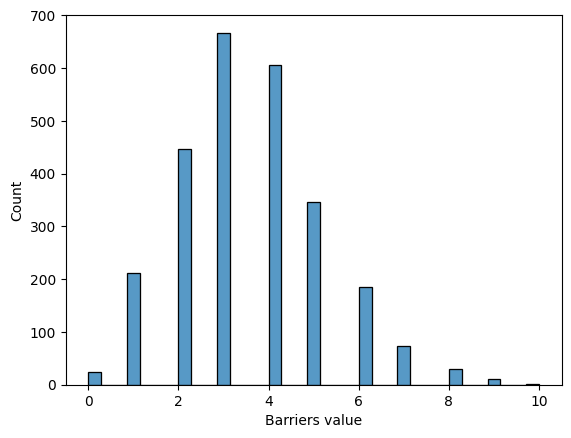

In [187]:
sns.histplot(data= gen_df, x="Barriers value")

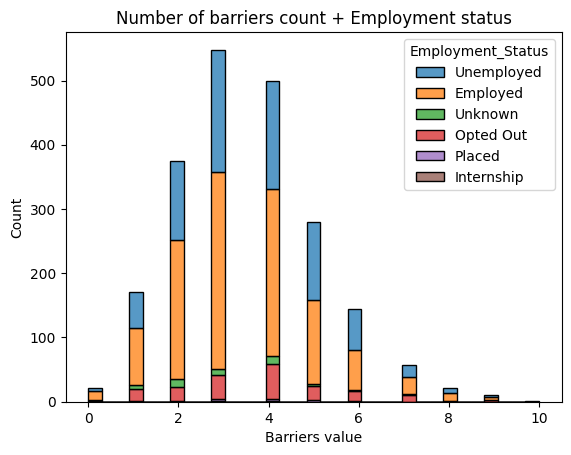

In [189]:
sns.histplot(data= gen_df, 
             x="Barriers value", 
             hue="Employment_Status",
             multiple="stack")

plt.title("Number of barriers count + Employment status")
plt.show()

In [101]:
gen_df["Employment_Status"].value_counts()

Employment_Status
Employed      445
Unemployed    364
Opted Out      79
Unknown        36
Placed          6
Name: count, dtype: int64

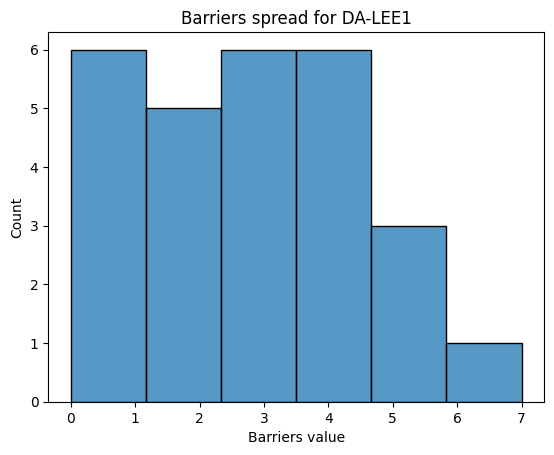

In [190]:
sns.histplot(gen_df[gen_df["Cohort_name"] == "DA-LEE1"], x= "Barriers value")
plt.title("Barriers spread for DA-LEE1")
plt.show()

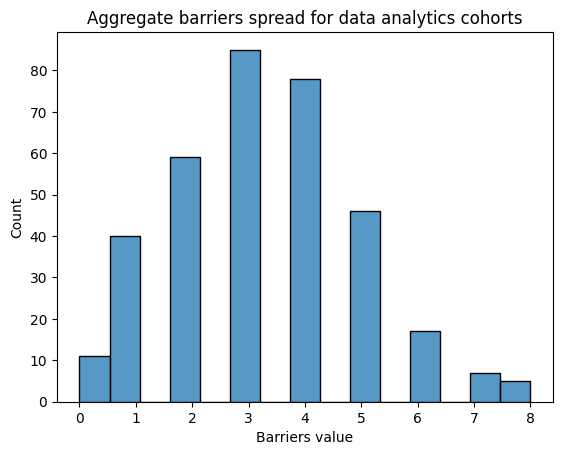

In [191]:
sns.histplot(gen_df[gen_df["ProgramName"] == "Data Analytics"], x= "Barriers value")
plt.title("Aggregate barriers spread for data analytics cohorts")
plt.show()

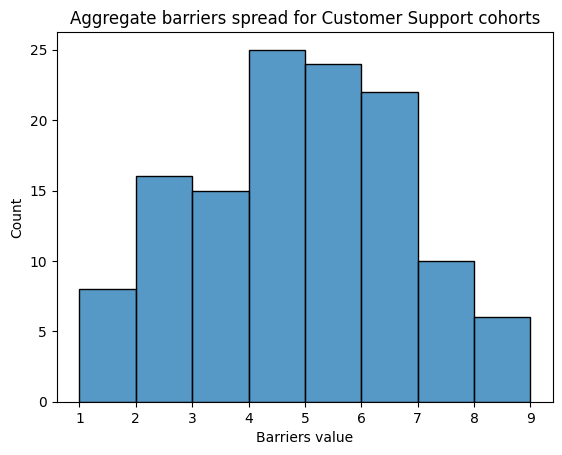

In [192]:
sns.histplot(gen_df[gen_df["ProgramName"] == "Customer Support"], x= "Barriers value")
plt.title("Aggregate barriers spread for Customer Support cohorts")
plt.show()

Text(0.5, 1.0, 'Number of barriers count + Programme name')

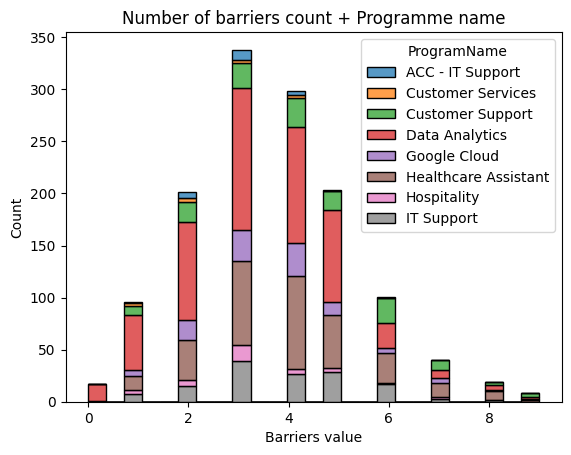

In [105]:
sns.histplot(data= gen_df, 
             x="Barriers value", 
             hue="ProgramName",
             multiple="stack")

plt.title("Number of barriers count + Programme name")

In [193]:
total_EAL = gen_df["is_EAL"][gen_df["is_EAL"]==1].count()
total_EAL

964

Text(0.5, 1.0, 'Employment status count + EAL')

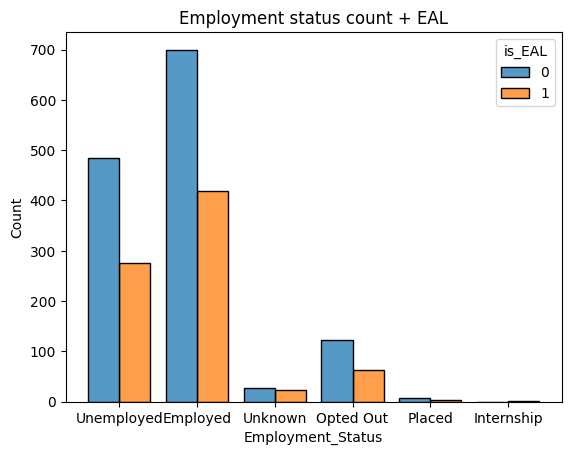

In [194]:
# How does EAL relate to post-bootcamp placement?


sns.histplot(data= gen_df, 
             x="Employment_Status", 
             hue="is_EAL",
             multiple="dodge",
             shrink=.8)

plt.title("Employment status count + EAL")

Text(0.5, 1.0, 'Employment status count + EAL')

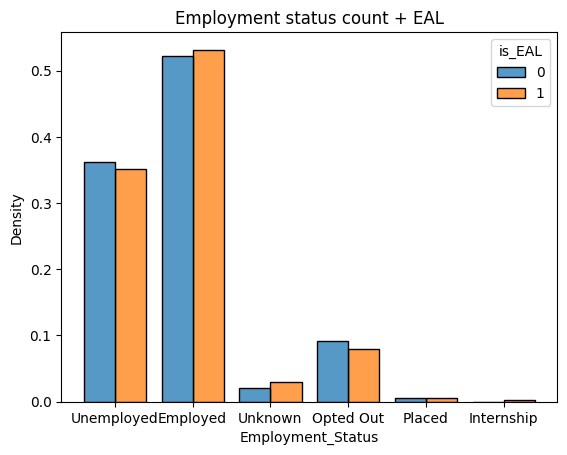

In [196]:
# How does EAL relate to post-bootcamp placement?


sns.histplot(data= gen_df, 
             x="Employment_Status", 
             hue="is_EAL",
             multiple="dodge",
             stat="density",
             common_norm=False,
             shrink=.8)

plt.title("Employment status count + EAL")

Text(0.5, 1.0, 'Employment status count + EAL')

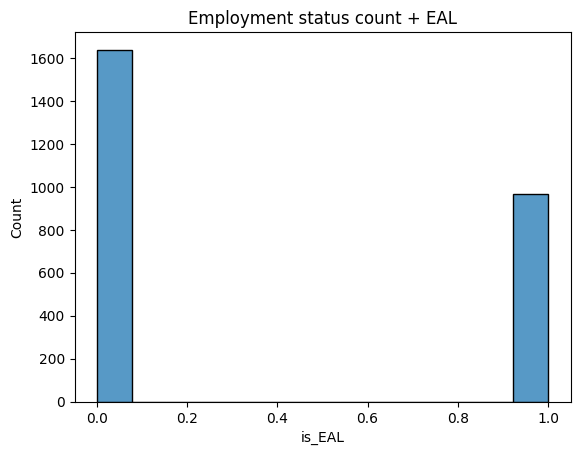

In [197]:
sns.histplot(data= gen_df, 
             x="is_EAL")

plt.title("Employment status count + EAL")

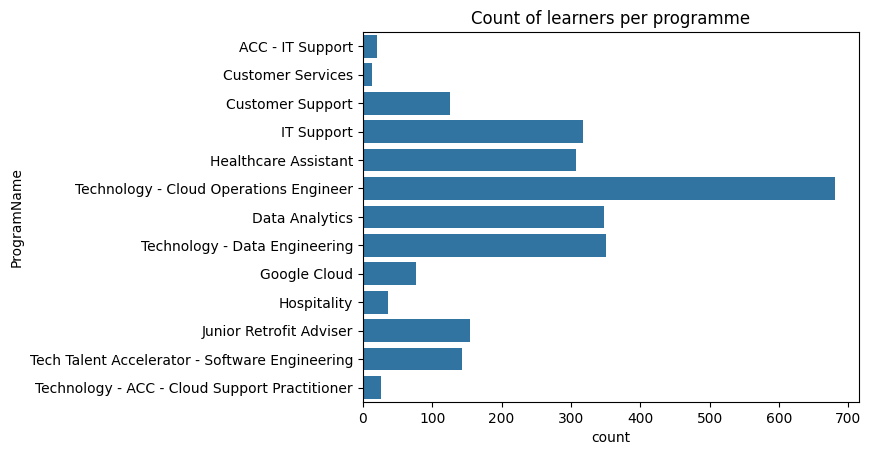

In [198]:
sns.countplot(y=gen_df["ProgramName"])
plt.title("Count of learners per programme")
plt.show()

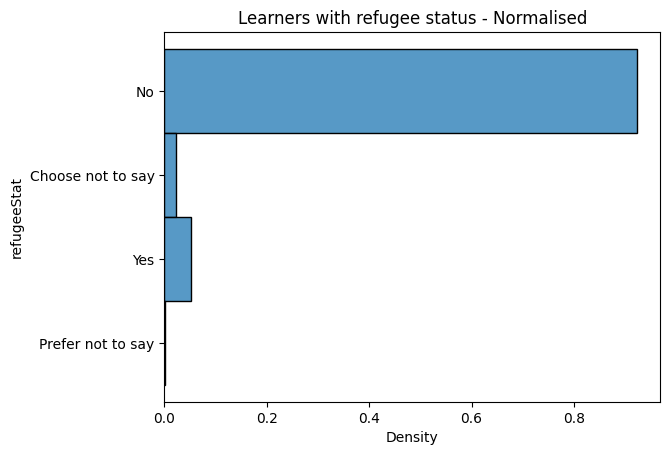

In [199]:
sns.histplot(y=gen_df["refugeeStat"],
             stat="density",
             common_norm=False)
plt.title("Learners with refugee status - Normalised")
plt.show()

# Less than 10% of learners state report they have refugee status

In [200]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [201]:
@interact
def describe_col(column=list(gen_df.columns)):
    print(gen_df[column].describe())

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Lea…

In [202]:
gen_df["gender"].replace(to_replace=["Other/Prefer to self describe",
                                           "Other",
                                           "Non-binary",
                                           "Trans man",
                                           "Choose not to identify"],
                               value= "Other",
                               inplace=True)

In [203]:
gen_df["Employment_Status"].replace(to_replace="Placed",
                               value= "Employed",
                               inplace=True)

In [204]:
# Cleaning is_lone_parent

gen_df["is_lone_parent"].fillna(0, inplace=True)

In [205]:
# Cleaning Education Level in a way that maintains ordinality:

gen_df["Education level"].replace(to_replace=["Level 1",
                                           "Level 2",
                                           "Level 3",
                                           "Level 4",
                                           "Level 5",
                                           "Level 6",
                                           "Level 7",
                                           "Level 8",
                                           "Entry level",
                                           "Other"
                                          ],
                               value= [1, 2, 3, 4, 5, 6, 7, 8, None, None],
                               inplace=True)

In [206]:
gen_df["Education level"].isna().sum()

106

In [207]:
gen_df.dropna(subset="Education level", inplace=True, axis=0)

In [208]:
gen_df["Education level"].isna().sum()

0

In [209]:
# Cleaning Has_dependents:

gen_df["Has_dependents"].fillna(0, inplace=True)

In [210]:
# Cleaning Age at application:

gen_df["Age_at_application"].fillna(gen_df["Age_at_application"].median(), inplace=True)

In [211]:
@interact
def histplot_col(column=list(gen_df.columns)):
    sns.histplot(y=gen_df[column],
             stat="density",
             common_norm=False)
    
    plt.title(f"Histogram of {column}")
    plt.show()

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Lea…

Text(0.5, 1.0, 'Employment status count + Education level')

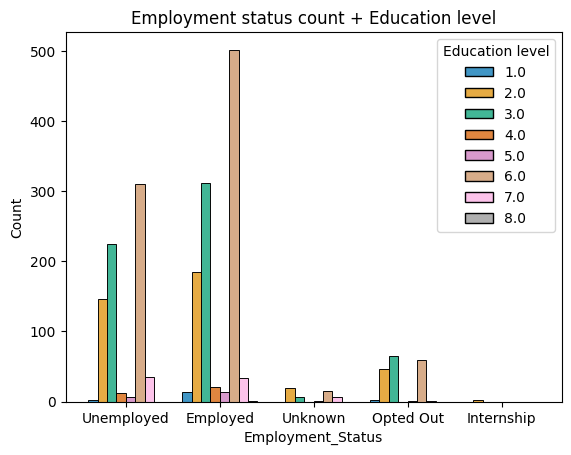

In [212]:
# How does education level relate to post-bootcamp placement?


sns.histplot(data= gen_df, 
             x="Employment_Status", 
             hue="Education level",
             multiple="dodge",
             common_norm=False,
             shrink=.8,
             palette="colorblind")

plt.title("Employment status count + Education level")

People with L7 education are more often unemployed post-programme. This is different than the other educational categories and surprising since one might assume having more education will result in a higher chance of getting employed.

In [213]:
list(pd.unique(gen_df["Education level"].values))

[3.0, 2.0, 4.0, 6.0, 5.0, 7.0, 1.0, 8.0]

In [214]:
@interact

def histplot_barriers_edu(val = list(pd.unique(gen_df["Education level"].values))):
    sns.histplot(data= gen_df[gen_df["Education level"] == val], 
            y="Barriers value",
            hue="is_EAL",
            multiple="dodge",
            common_norm=False,
            shrink=.8,
            palette="colorblind"
            )
    plt.title("Do people with EAL tend to have more barriers? Filter based on education level")
    plt.show()

interactive(children=(Dropdown(description='val', options=(3.0, 2.0, 4.0, 6.0, 5.0, 7.0, 1.0, 8.0), value=3.0)…

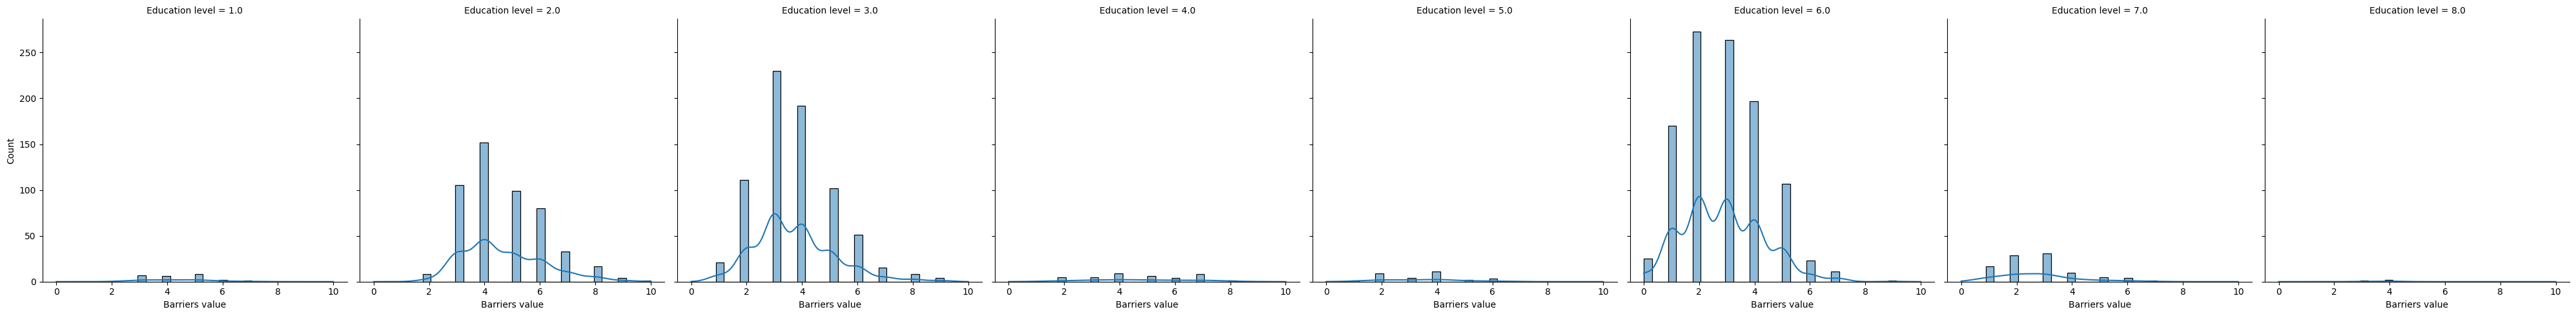

In [215]:
sns.displot(data=gen_df,
            x="Barriers value",
            col="Education level",
            kde=True)

plt.show()

In [216]:
@interact
def histplot_col(column=list(gen_df.columns)):
    sns.histplot(y=gen_df[column],
             hue=gen_df["Employment_Status"],
             multiple="dodge",
             shrink=.8
            )
    
    plt.title(f"Histogram of {column}")
    plt.show()

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Lea…

In [126]:
['Cohort_name', 'Student_ID', ,
                 'areaLocal', 'Barriers value', 'Cohort_City', 
                 'Current_Employer_Name', 'Current_position','education', 
                 'educationStatusAtApplication','Employment_Status', 
                 'employmentAttemptPreGen','employmentHoursPreGen', 'employmentIndustryPreGen','employmentSatisfactionPreGen', 'employmentStatusPreGen',
                 'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
                 'Financial_Situation_PostGen', 'financialSituationPreGen', 
                 'First_Placement_Date','has_degree', 'Has_dependents', ,
                 'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled','is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
                 'is_lone_parent', 'is_low_socio_econ', 'is_unempl_12+_mths','is_unemployed_pre_gen', 'is_unsatisfied_empl_pre_gen',
                 'learnerSpecialNeedsDetails', 'postCode', 'PostGenAspirationPosition','refugeeStat', 'religion', 'sexualityInfo', 'socioeconStatus',
                 'socioeconStatusMap', 'Unemployment_length', 'wellbeingConfidence','WellbeingConfidenceBaseline']

SyntaxError: invalid syntax (1731409874.py, line 1)

Cleaning still needed:
- Clean 'Education level' feature
- Check gender feature (done, options are now male, female, other)
- What is the difference between wellbeingconfidence and wellbeing confidence baseline?
- Clean employment status feature (Done, replaced "placed" with "Employed")
- Find more continuous data (number of absences, transition tracker scores, grade for PL900 for DA, number of safeguarding concerns, 2021_job_density of the region they live in
- Deal with education level imputation

Questions:
- Can I do PCA and will it be useful if I have mostly categorical data that is one hot encoded?

In [148]:
# Trialing PCA with the barriers information I have

# I am not including employment status in this, I want to see if the principal components that are uncovered correlate at all to employment.

X = gen_df[['ProgramName', 
                  'Cohort_City',
                  "Barriers value",
                  'Age_at_application', 
                  'Education level', 
                  'gender', 
                  'Has_dependents',
                  'Is_disabled',
                  'is_EAL',
                  'is_lone_parent', 
                  'refugeeStat',
                  'socioeconStatusMap',
                  'Unemployment_length',
                 ]]
                  

In [149]:
# Do one hot encoding
X = pd.get_dummies(X)

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1320
Data columns (total 43 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Barriers value                                       1243 non-null   int64  
 1   Age_at_application                                   1243 non-null   float64
 2   Education level                                      1243 non-null   float64
 3   Has_dependents                                       1243 non-null   float64
 4   Is_disabled                                          1243 non-null   int64  
 5   is_EAL                                               1243 non-null   int64  
 6   is_lone_parent                                       1243 non-null   float64
 7   ProgramName_ACC - IT Support                         1243 non-null   bool   
 8   ProgramName_Customer Services                        1243 non-null   bool

I should not do PCA on a dataset that is mostly categorical features, I need to decide how else I will analyse data

In [151]:
# standardise and scale the data ahead of pca:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(X)
scaled_data

array([[ 0.23721544, -0.52642646,  0.8733556 , ..., -0.14326706,
         2.26343825, -0.04918694],
       [ 0.23721544, -0.06683166, -0.72779633, ..., -0.14326706,
         2.26343825, -0.04918694],
       [-0.98373195,  2.69073711,  0.8733556 , ..., -0.14326706,
         2.26343825, -0.04918694],
       ...,
       [ 0.84768914, -0.75622386, -1.26151364, ..., -0.14326706,
        -0.44180574, -0.04918694],
       [-0.37325825, -0.98602126, -0.72779633, ..., -0.14326706,
        -0.44180574, -0.04918694],
       [ 1.45816283, -0.52642646, -1.79523095, ..., -0.14326706,
        -0.44180574, -0.04918694]])

In [152]:
# now we need to convert the array back into a dataframe:
column_names = X.columns.to_list()
scaled_dataframe_X=pd.DataFrame(scaled_data, columns= column_names) 

In [153]:
# Use daat.describe() to make sure the standardisation and scaling worked
scaled_dataframe_X.describe()

,Barriers value,Age_at_application,Education level,Has_dependents,Is_disabled,is_EAL,is_lone_parent,ProgramName_ACC - IT Support,ProgramName_Customer Services,ProgramName_Customer Support,...,socioeconStatusMap_Professional backgrounds,Unemployment_length_1 to 2 years,Unemployment_length_12+ months,Unemployment_length_2 to 4 years,Unemployment_length_3 to 6 months,Unemployment_length_6 to 12 months,Unemployment_length_Less than 3 months,Unemployment_length_More than 4 years,Unemployment_length_Not applicable,Unemployment_length_Unknown
count,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,...,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1243.000000
mean,-3.429812e-17,-1.257598e-16,1.600579e-16,1.714906e-17,-2.858177e-17,1.143271e-16,-1.143271e-17,4.573083e-17,-2.858177e-17,4.573083e-17,...,-1.143271e-17,-1.714906e-17,5.716353e-18,-6.287989e-17,1.714906e-17,-2.286541e-17,1.229016e-16,-5.716353e-18,-3.429812e-17,0.000000
std,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,...,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402
min,-2.204679e+00,-1.330717e+00,-1.795231e+00,-6.210718e-01,-4.803052e-01,-7.757604e-01,-2.349005e-01,-1.212183e-01,-9.449112e-02,-3.432284e-01,...,-6.297851e-01,-2.004180e-01,-4.313568e-01,-1.702161e-01,-3.843667e-01,-4.128355e-01,-4.942107e-01,-1.432671e-01,-4.418057e-01,-0.049187
25%,-3.732583e-01,-7.562239e-01,-7.277963e-01,-6.210718e-01,-4.803052e-01,-7.757604e-01,-2.349005e-01,-1.212183e-01,-9.449112e-02,-3.432284e-01,...,-6.297851e-01,-2.004180e-01,-4.313568e-01,-1.702161e-01,-3.843667e-01,-4.128355e-01,-4.942107e-01,-1.432671e-01,-4.418057e-01,-0.049187
50%,-3.732583e-01,-2.966291e-01,3.396383e-01,-6.210718e-01,-4.803052e-01,-7.757604e-01,-2.349005e-01,-1.212183e-01,-9.449112e-02,-3.432284e-01,...,-6.297851e-01,-2.004180e-01,-4.313568e-01,-1.702161e-01,-3.843667e-01,-4.128355e-01,-4.942107e-01,-1.432671e-01,-4.418057e-01,-0.049187
75%,8.476891e-01,6.225605e-01,8.733556e-01,1.610120e+00,-4.803052e-01,1.289058e+00,-2.349005e-01,-1.212183e-01,-9.449112e-02,-3.432284e-01,...,1.587843e+00,-2.004180e-01,-4.313568e-01,-1.702161e-01,-3.843667e-01,-4.128355e-01,-4.942107e-01,-1.432671e-01,-4.418057e-01,-0.049187
max,3.289584e+00,4.184420e+00,1.940790e+00,1.610120e+00,2.082010e+00,1.289058e+00,4.257121e+00,8.249579e+00,1.058301e+01,2.913512e+00,...,1.587843e+00,4.989572e+00,2.318266e+00,5.874886e+00,2.601682e+00,2.422272e+00,2.023428e+00,6.979971e+00,2.263438e+00,20.330601


In [154]:
scaled_dataframe_X.isna().sum()

Barriers value                                         0
Age_at_application                                     0
Education level                                        0
Has_dependents                                         0
Is_disabled                                            0
is_EAL                                                 0
is_lone_parent                                         0
ProgramName_ACC - IT Support                           0
ProgramName_Customer Services                          0
ProgramName_Customer Support                           0
ProgramName_Data Analytics                             0
ProgramName_Google Cloud                               0
ProgramName_Healthcare Assistant                       0
ProgramName_Hospitality                                0
ProgramName_IT Support                                 0
Cohort_City_Birmingham                                 0
Cohort_City_Dublin                                     0
Cohort_City_Ireland            

In [155]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=4)

In [156]:
PCA_components = pca_model.fit_transform(scaled_dataframe_X)

# Now print the explained variance ratio which is an attriburte of the model object:
print(pca_model.explained_variance_ratio_)

[0.06948342 0.06294324 0.05120497 0.04403795]


In [157]:
# For the variable pca_components, put this into a dataframe such that there are 4 columns called PC1, PC2, PC3 and PC4.
pca_dataframe = pd.DataFrame(PCA_components, columns=["PC1", "PC2", "PC3", "PC4"])

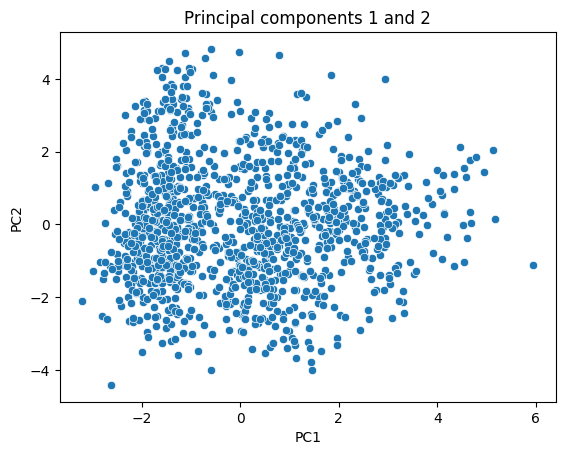

In [158]:
# Plot a scatter plot of the first two principal using the dataframe that you created above.
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Principal components 1 and 2")
sns.scatterplot(data=pca_dataframe, 
                x="PC1", 
                y="PC2")
plt.show()

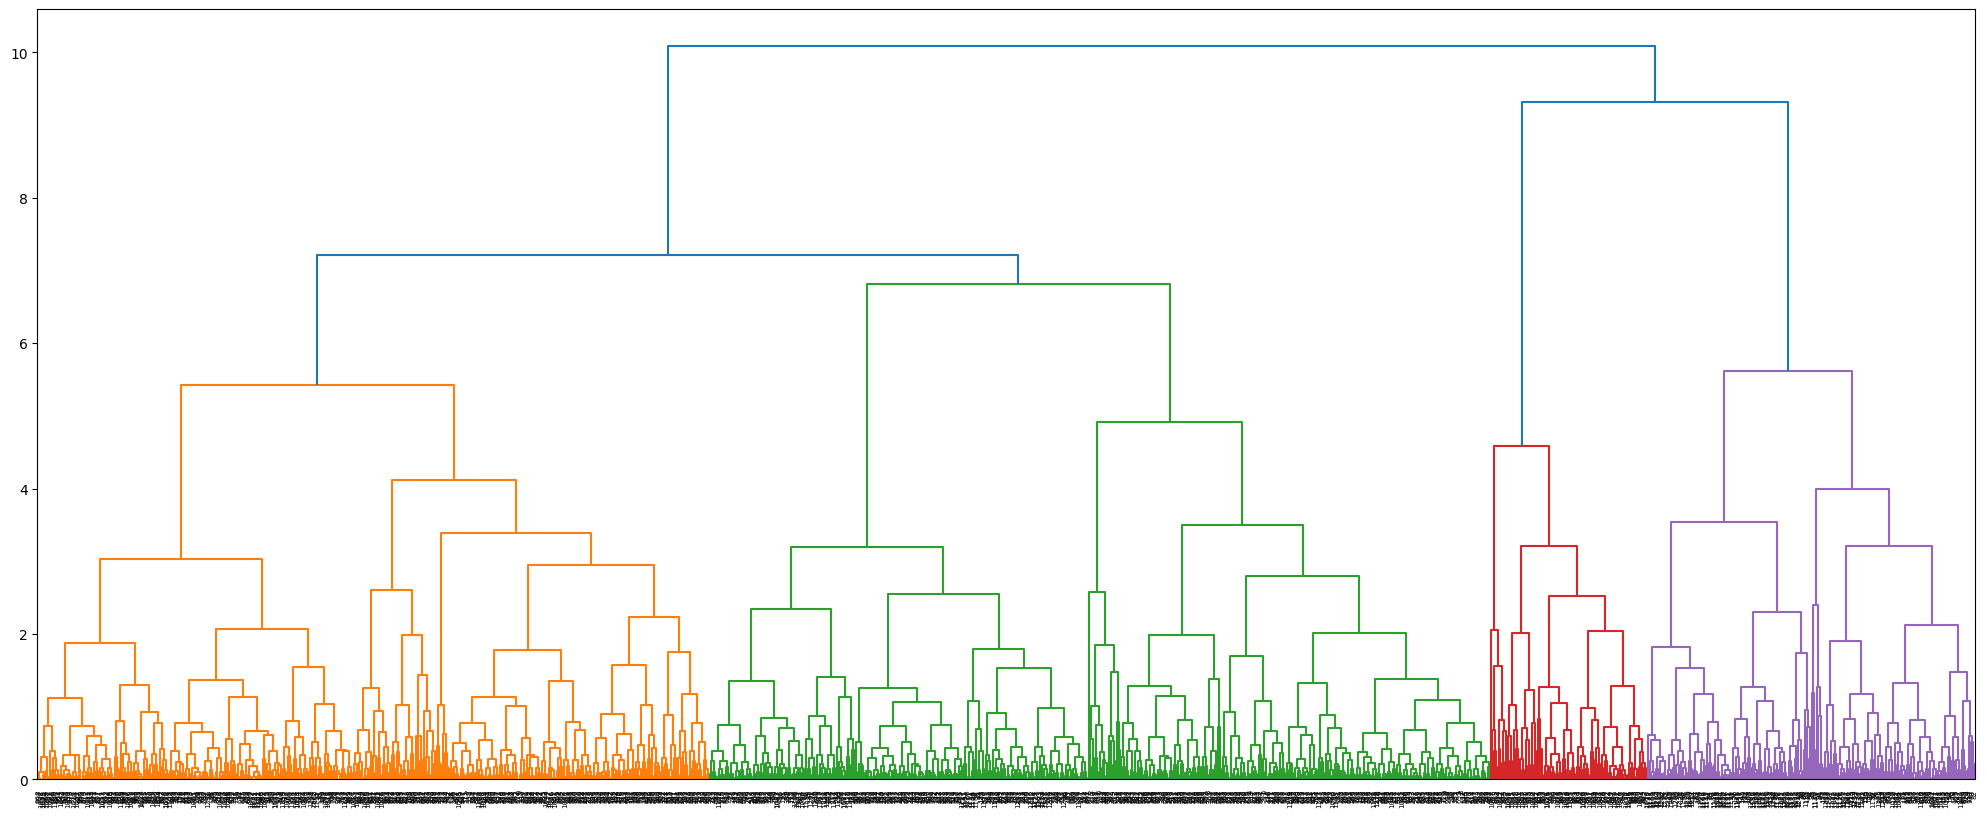

<Axes: xlabel='PC1', ylabel='PC2'>

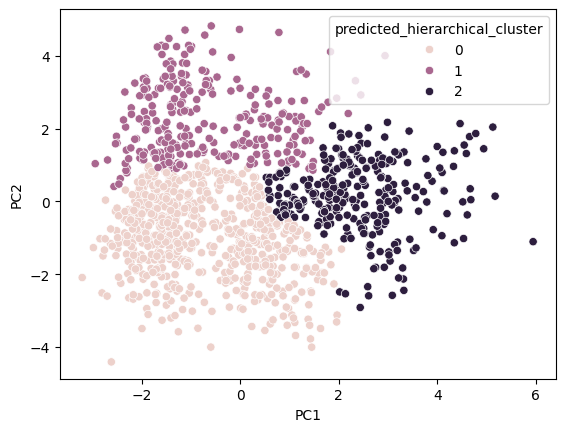

In [159]:
# Challenge: Using the first two principal components, can you use Hierarchical Clustering to get the appropriate amount of clusters?
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt


## Step 1: Use PC1 and PC2 for hierarchical clustering.
clusters = hierarchy.linkage(pca_dataframe[["PC1", "PC2"]], method="complete")

## Step 2: Show the dendrogram.
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clusters)
plt.show()

## Step 3: Perform Hierarchical Clustering using your chosen amount of clusters.
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
Y_preds = clustering.fit_predict(pca_dataframe[["PC1", "PC2"]])

pca_dataframe["predicted_hierarchical_cluster"] = Y_preds

## Step 4: Plot the hierarchical clustering results. Do they make sense?
sns.scatterplot(
    data = pca_dataframe,
    x = "PC1",
    y = "PC2",
    hue = "predicted_hierarchical_cluster"
)

In [218]:
gen_df["Days Since Cohort Graduation"].isna().sum()

0

In [ ]:
 60  Total Days Absent                      2602 non-null   int64  
 61  Total Days Late                        2602 non-null   int64  
 62  Average Score - Soft Skills            1332 non-null   float64
 63  Average Score - Technical Skills   

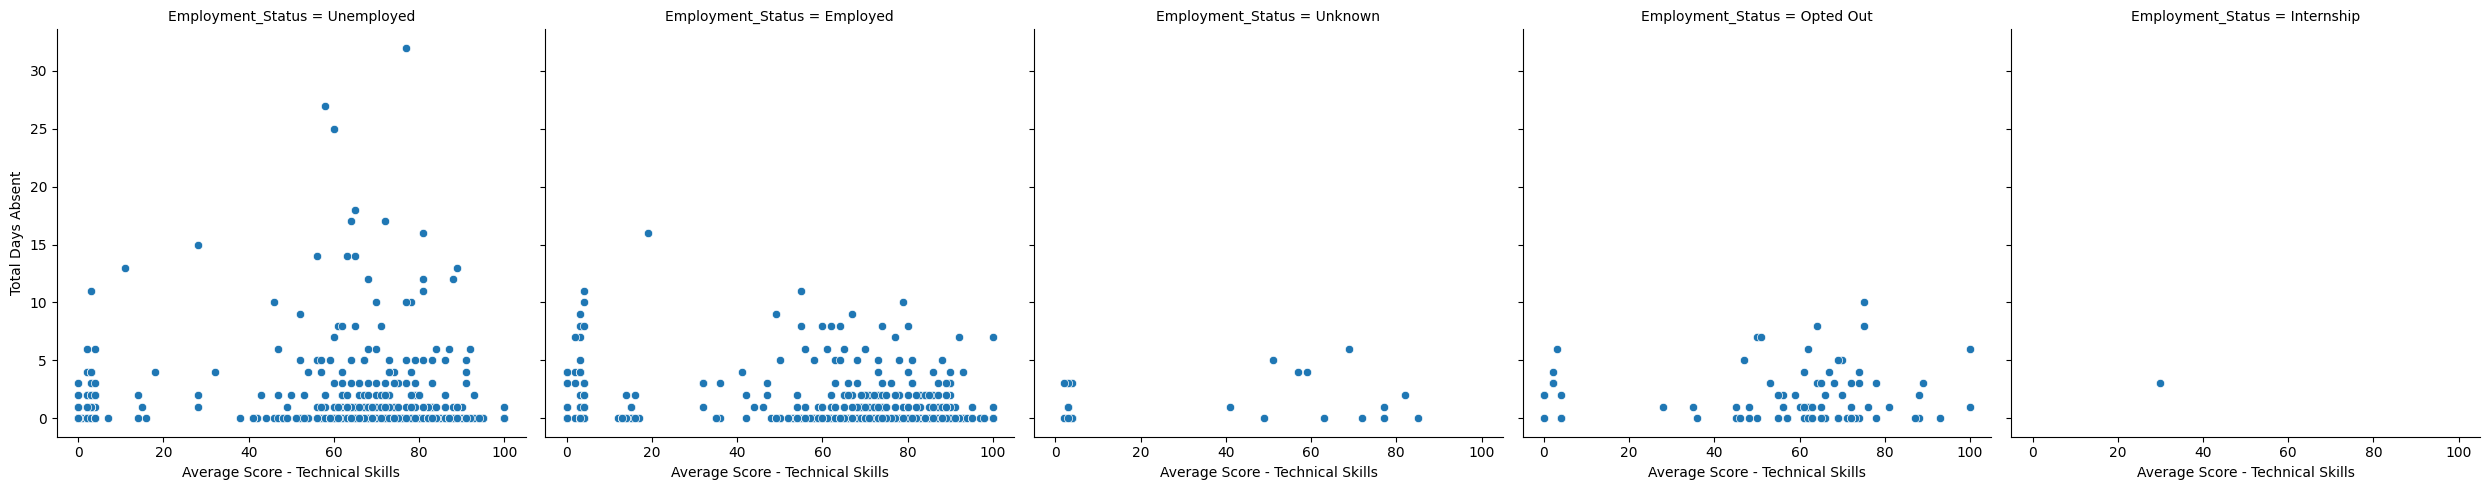

In [227]:
sns.relplot(y="Total Days Absent",
            x="Average Score - Technical Skills",
            data=gen_df,
            kind="scatter",
            col="Employment_Status")

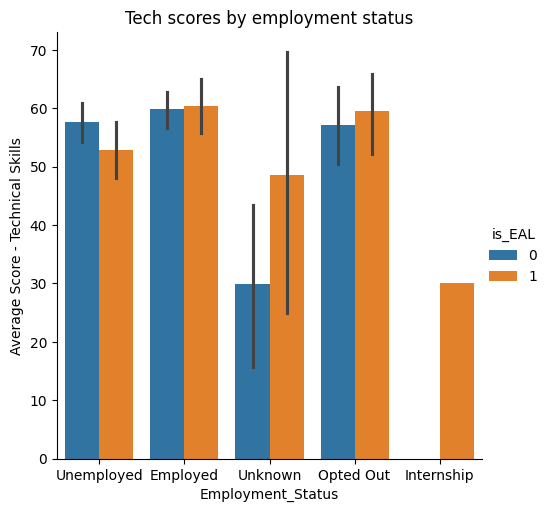

In [231]:
sns.catplot(data=gen_df,
            kind="bar",
            x="Employment_Status",
            y="Average Score - Technical Skills",
            hue="is_EAL"
           )
plt.title("Tech scores by employment status")
plt.show()

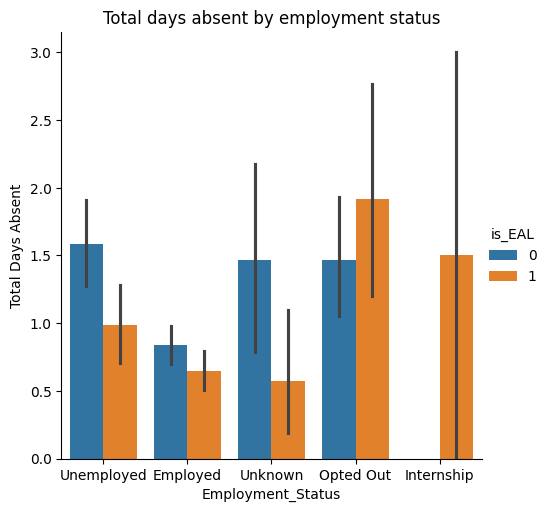

In [233]:
sns.catplot(data=gen_df,
            kind="bar",
            x="Employment_Status",
            y="Total Days Absent",
            hue="is_EAL"
           )
plt.title("Total days absent by employment status")
plt.show()

In [248]:
gen_df["Graduation Date"].head()

1   2022-06-24
2   2022-06-24
3   2022-06-24
4   2022-06-24
6   2022-06-24
Name: Graduation Date, dtype: datetime64[ns]

In [236]:
gen_df["First_Placement_Date"] = pd.to_datetime(gen_df["First_Placement_Date"], format= "%Y-%m-%d")

In [243]:
gen_df["Graduation Date"] = pd.to_datetime(gen_df["Graduation Date"], format= "%m/%d/%Y")

In [246]:
gen_df["Search_duration"] = gen_df["First_Placement_Date"] - gen_df["Graduation Date"]

In [247]:
gen_df["Search_duration"].head()

1        NaT
2    52 days
3   130 days
4        NaT
6        NaT
Name: Search_duration, dtype: timedelta64[ns]

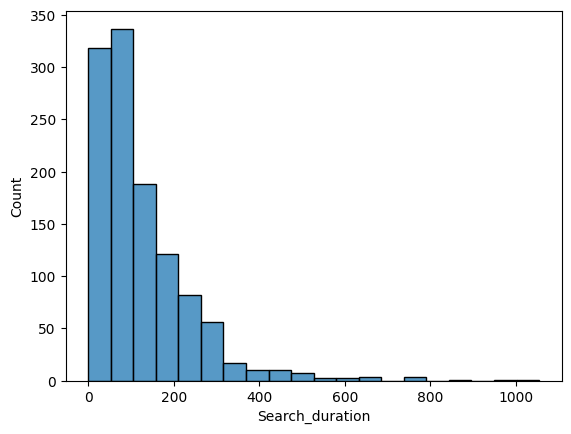

In [263]:
Search_duration_noNaN = gen_df["Search_duration"].dropna()
Search_duration_noNaN_int = Search_duration_noNaN.dt.days


x_temp=Search_duration_noNaN_int[Search_duration_noNaN_int >= 0]
sns.histplot(x=x_temp,
            bins=20)

plt.show()
    

In [264]:
gen_df["Search_duration"] = gen_df["Search_duration"].dt.days

In [265]:
gen_df["Search_duration"].head()

1      NaN
2     52.0
3    130.0
4      NaN
6      NaN
Name: Search_duration, dtype: float64

In [277]:
gen_df["ProgramName"].value_counts()

ProgramName
Technology - Cloud Operations Engineer            668
Technology - Data Engineering                     348
Data Analytics                                    344
IT Support                                        305
Healthcare Assistant                              257
Junior Retrofit Adviser                           152
Tech Talent Accelerator - Software Engineering    141
Customer Support                                  120
Google Cloud                                       77
Hospitality                                        33
Technology - ACC - Cloud Support Practitioner      22
ACC - IT Support                                   18
Customer Services                                  11
Name: count, dtype: int64

In [308]:
# Distribution of grads per programme and how many are EAL vs non-EAL:

@interact
def EAL_grads_per_programme_hist(Prog_name=gen_df["ProgramName"].value_counts().index.tolist()):
    sns.histplot(x=gen_df["is_EAL"][gen_df["ProgramName"]==Prog_name],
                bins=20,
                palette="pastel"
               )

    plt.title("Number of EAL vs non-EAL grads")
    plt.show()

interactive(children=(Dropdown(description='Prog_name', options=('Technology - Cloud Operations Engineer', 'Te…

In [344]:
@interact
def search_duration_hist(Prog_name=gen_df["ProgramName"].value_counts().index.tolist()):
    sns.displot(x=gen_df["Search_duration"][(gen_df["Search_duration"]>=0.0) & (gen_df["ProgramName"]==Prog_name)],
                bins=20,
                kde=True,
                hue=gen_df["is_EAL"],
                palette="pastel"
               )

    plt.title("Job search duration for Employed graduates")
    plt.show()

interactive(children=(Dropdown(description='Prog_name', options=('Technology - Cloud Operations Engineer', 'Te…

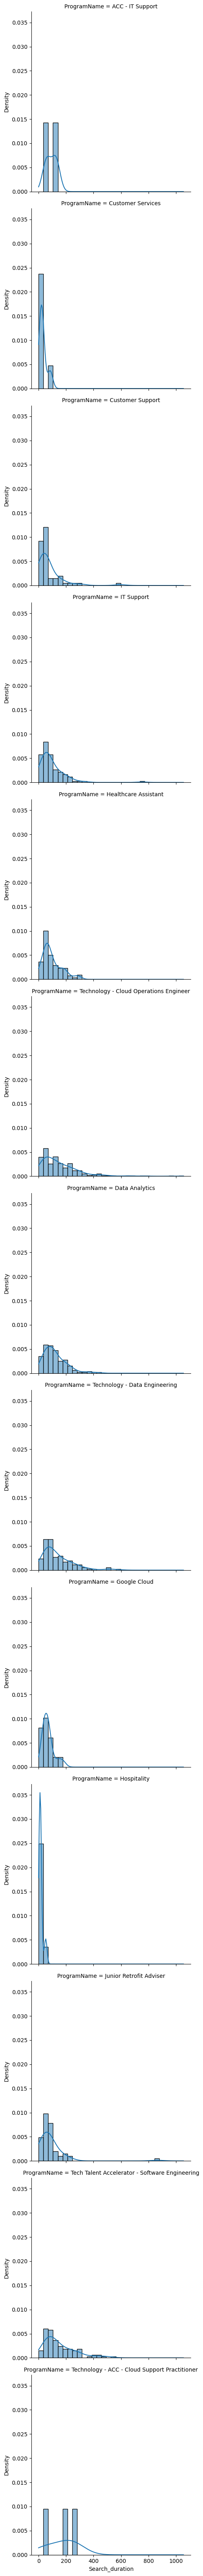

In [291]:
sns.displot(x=gen_df["Search_duration"][(gen_df["Search_duration"]>=0.0)],
            bins=30,
            kde=True,
            stat="density",
            common_norm=False,
            row=gen_df["ProgramName"]
           )
plt.show()

In [377]:
# How does EAL relate to post-bootcamp placement?

@interact
def EAL_by_program_hist(Prog_name=gen_df["Cohort_name"].value_counts().index.tolist()):
    
    sns.histplot(data= gen_df[gen_df["Cohort_name"]==Prog_name], 
                 x="Employment_Status", 
                 hue="is_EAL",
                 multiple="dodge",
                 # stat="density",
                 # common_norm=False,
                 shrink=.8)
    
    plt.title("Employment status count + EAL")

interactive(children=(Dropdown(description='Prog_name', options=('AWS-LON13', 'DA-LON3', 'AWS-LON12', 'DA-LON5…

In [317]:
gen_df_numeric.columns

Index(['Student_ID', 'Age_at_application', 'Barriers value',
       'Current_placement_aligned_to_training', 'Education level',
       'Employed_within_180D', 'Employed_within_90D', 'First_placement_by_gen',
       'has_degree', 'Has_dependents', 'has_worked_5+_years', 'IMD_decile',
       'Is_30_or_over', 'Is_disabled', 'is_EAL', 'is_ethnic_minority',
       'is_LGBTQ+', 'is_lone_parent', 'is_low_socio_econ',
       'is_unempl_12+_mths', 'is_unemployed_pre_gen',
       'is_unsatisfied_empl_pre_gen', 'Job_start_speed',
       'Days Since Cohort Graduation', 'Total Attendance Taken',
       'Total Days Absent', 'Total Days Late', 'Average Score - Soft Skills',
       'Average Score - Technical Skills', 'Search_duration'],
      dtype='object')

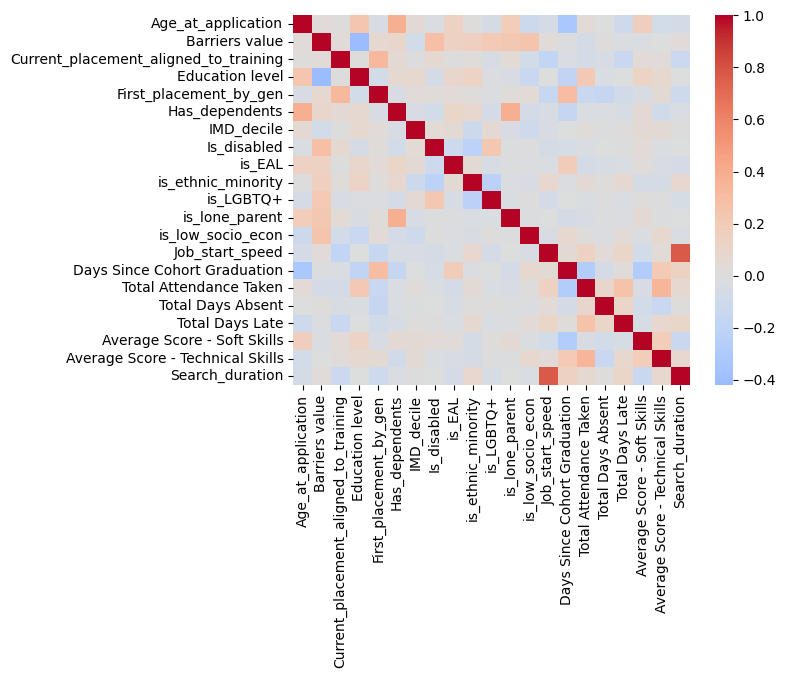

<Figure size 3000x3000 with 0 Axes>

In [323]:
# Create a correlation heatmap
gen_df_numeric = gen_df.select_dtypes(include=np.number)
gen_df_numeric= gen_df_numeric[['Age_at_application', 'Barriers value',
                               'Current_placement_aligned_to_training', 'Education level', 'First_placement_by_gen', 'Has_dependents','IMD_decile', 'Is_disabled', 'is_EAL', 'is_ethnic_minority',
                               'is_LGBTQ+', 'is_lone_parent', 'is_low_socio_econ', 'Job_start_speed',
                               'Days Since Cohort Graduation', 'Total Attendance Taken',
                               'Total Days Absent', 'Total Days Late', 'Average Score - Soft Skills',
                               'Average Score - Technical Skills', 'Search_duration']]

gen_data_matrix = gen_df_numeric.corr()
sns.heatmap(gen_data_matrix, 
            cmap='coolwarm',
            center=0)

plt.figure(figsize=(30, 30))
plt.show()

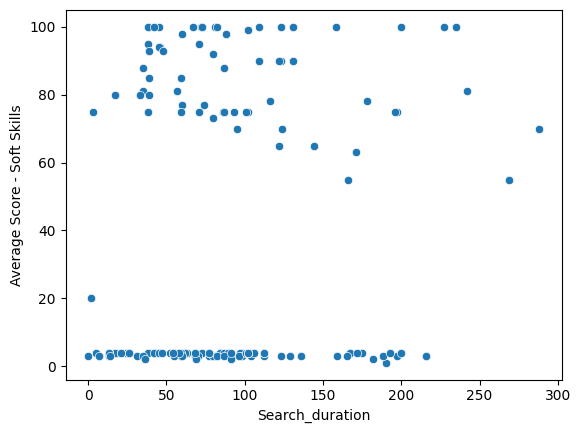

In [326]:
sns.scatterplot(x=gen_df["Search_duration"][(gen_df["Search_duration"]>=0.0)],
                y=gen_df["Average Score - Soft Skills"][(gen_df["Average Score - Soft Skills"]>0.0)],
           )
plt.show()

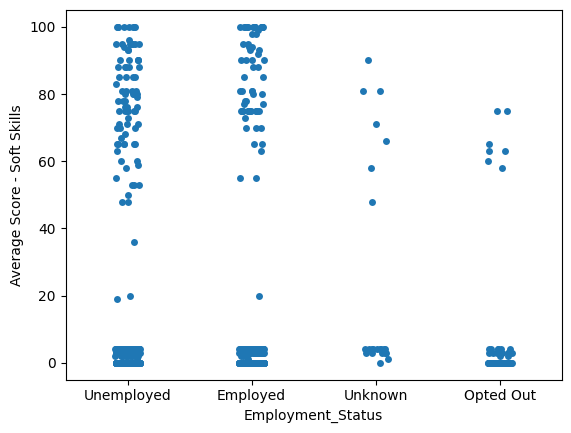

In [339]:
sns.stripplot(data=gen_df[gen_df["Employment_Status"]!="Internship"],
            x="Employment_Status",
            y="Average Score - Soft Skills",
            jitter=True
           )

plt.show()

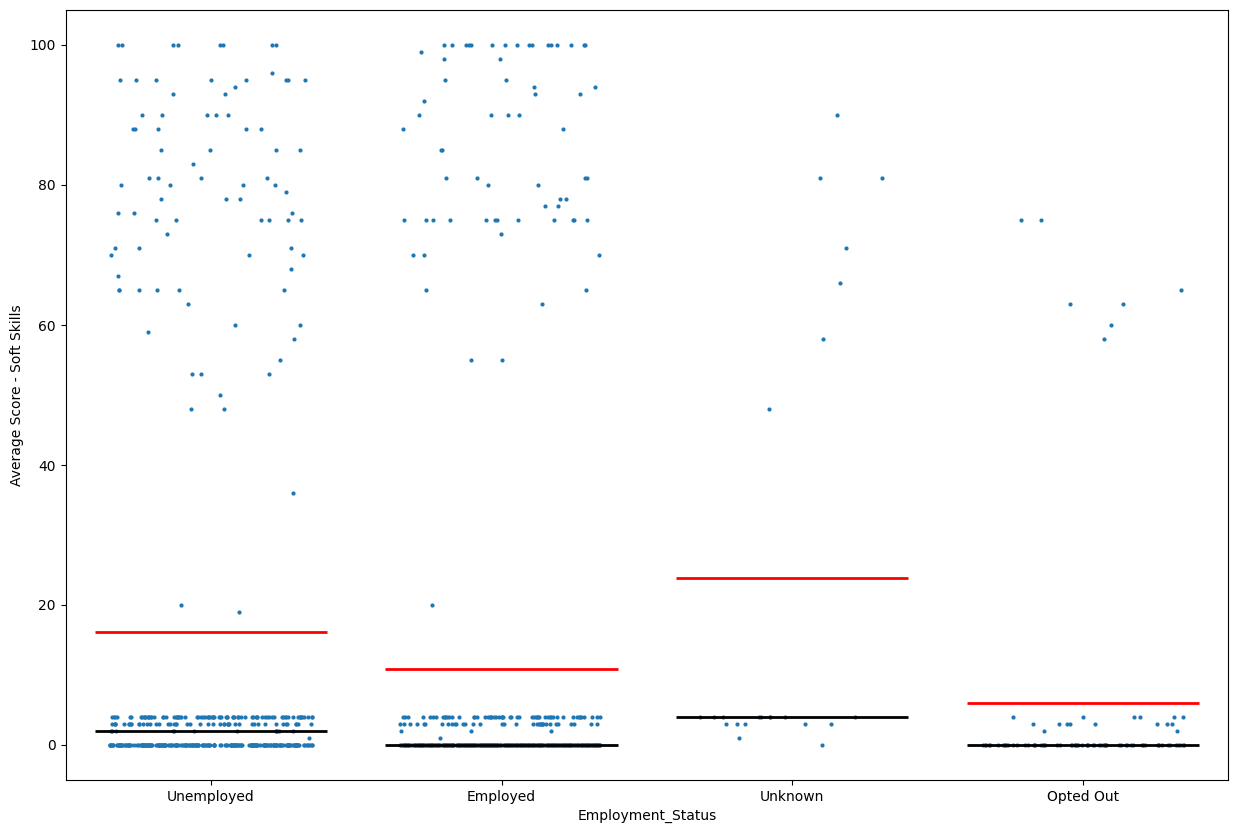

In [341]:
fig, axs = plt.subplots(1, 1, figsize=(15,10))

sns.stripplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
              x="Employment_Status",
              y="Average Score - Soft Skills",
              size= 3, 
              jitter=0.35, 
              ax=axs)

sns.boxplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
            x="Employment_Status",
            y="Average Score - Soft Skills",
            ax=axs, 
            meanprops={'visible': True, 'color': 'r', 'ls': '-', 'lw': 2},
            medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2}, whiskerprops={'visible': False}, 
            showmeans=True, meanline=True, showfliers=False, showbox=False, showcaps=False, zorder=10
           )

plt.show()

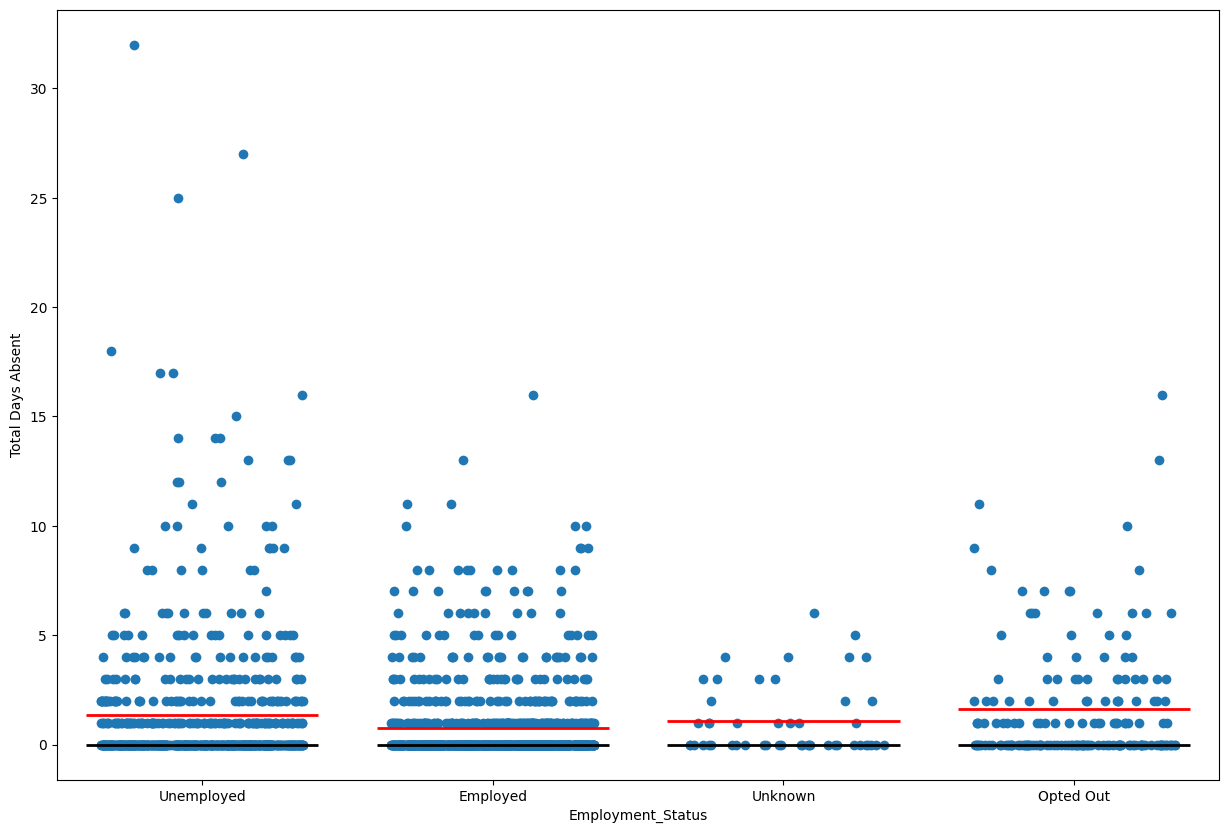

In [343]:
fig, axs = plt.subplots(1, 1, figsize=(15,10))

sns.stripplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
              x="Employment_Status",
              y="Total Days Absent",
              size= 7, 
              jitter=0.35, 
              ax=axs)

sns.boxplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
            x="Employment_Status",
            y="Total Days Absent",
            ax=axs, 
            meanprops={'visible': True, 'color': 'r', 'ls': '-', 'lw': 2},
            medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2}, whiskerprops={'visible': False}, 
            showmeans=True, meanline=True, showfliers=False, showbox=False, showcaps=False, zorder=10
           )

plt.show()

In [346]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.8 MB/s eta 0:00:00


In [347]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

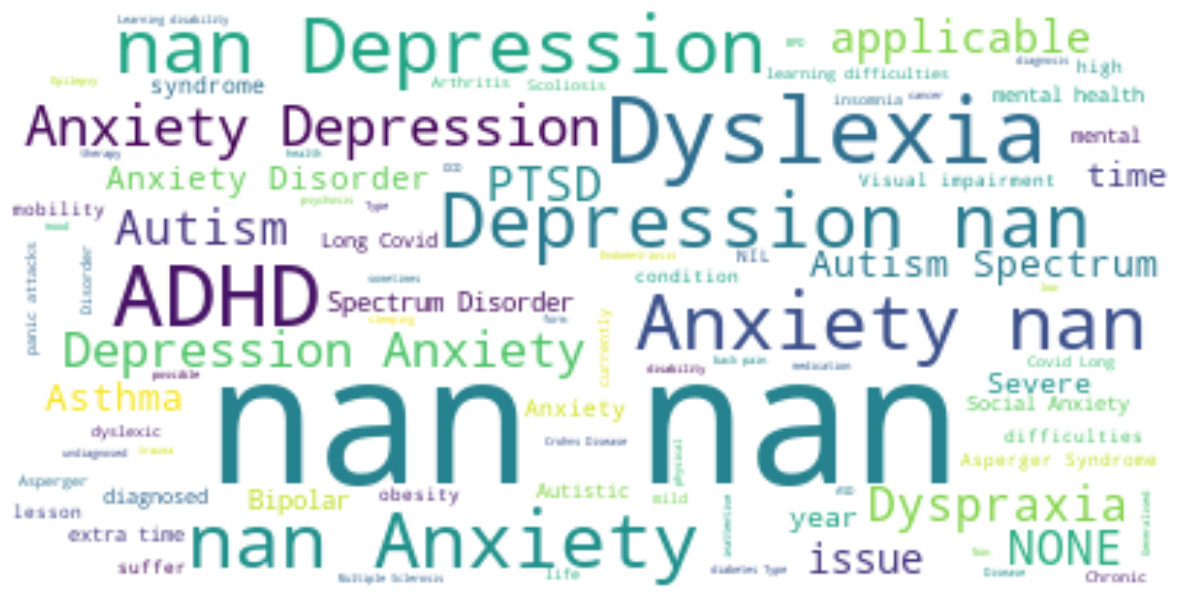

In [350]:
text = " ".join(i for i in gen_df["learnerSpecialNeedsDetails"].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [351]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2496 entries, 1 to 2601
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ProgramName                            2496 non-null   object        
 1   Cohort_name                            2496 non-null   object        
 2   Student_ID                             2496 non-null   int64         
 3   LearnerName                            2496 non-null   object        
 4   Age_at_application                     2496 non-null   float64       
 5   areaLocal                              2215 non-null   object        
 6   asylumSeeker                           1896 non-null   object        
 7   Barriers value                         2496 non-null   int64         
 8   birthDate                              2493 non-null   object        
 9   Cohort_City                            2358 non-null   object       

In [352]:
gen_df["Risk Level"].value_counts()

Risk Level
Low Risk            1247
Medium Risk          603
To Be Identified     466
High Risk            180
Name: count, dtype: int64

In [353]:
gen_df["Original Risk Level"].value_counts()

Original Risk Level
Low Risk            972
To Be Identified    637
Medium Risk         523
High Risk            87
Name: count, dtype: int64

<Axes: >

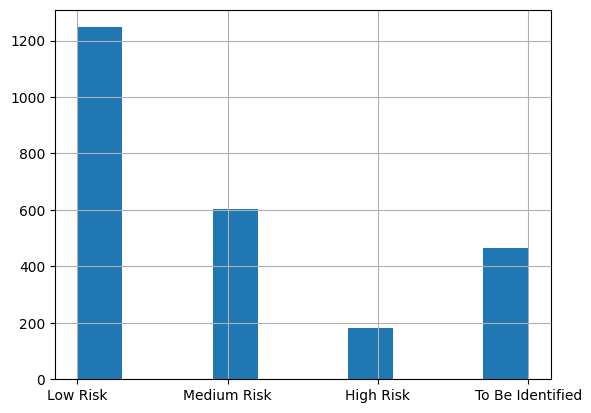

In [356]:
# Lets try converting some data into a categorical datatype:

from pandas.api.types import CategoricalDtype
risk_levels = CategoricalDtype(categories=["Low Risk", "Medium Risk", "High Risk", "To Be Identified"], ordered=True)

temp = gen_df["Risk Level"].astype(risk_levels)

temp.hist()

<Axes: >

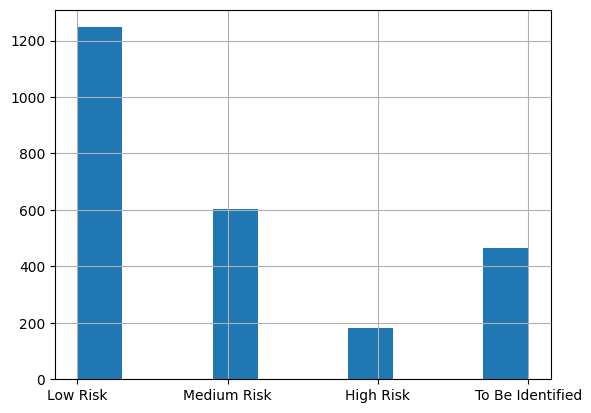

In [358]:
gen_df["Risk Level"].hist()

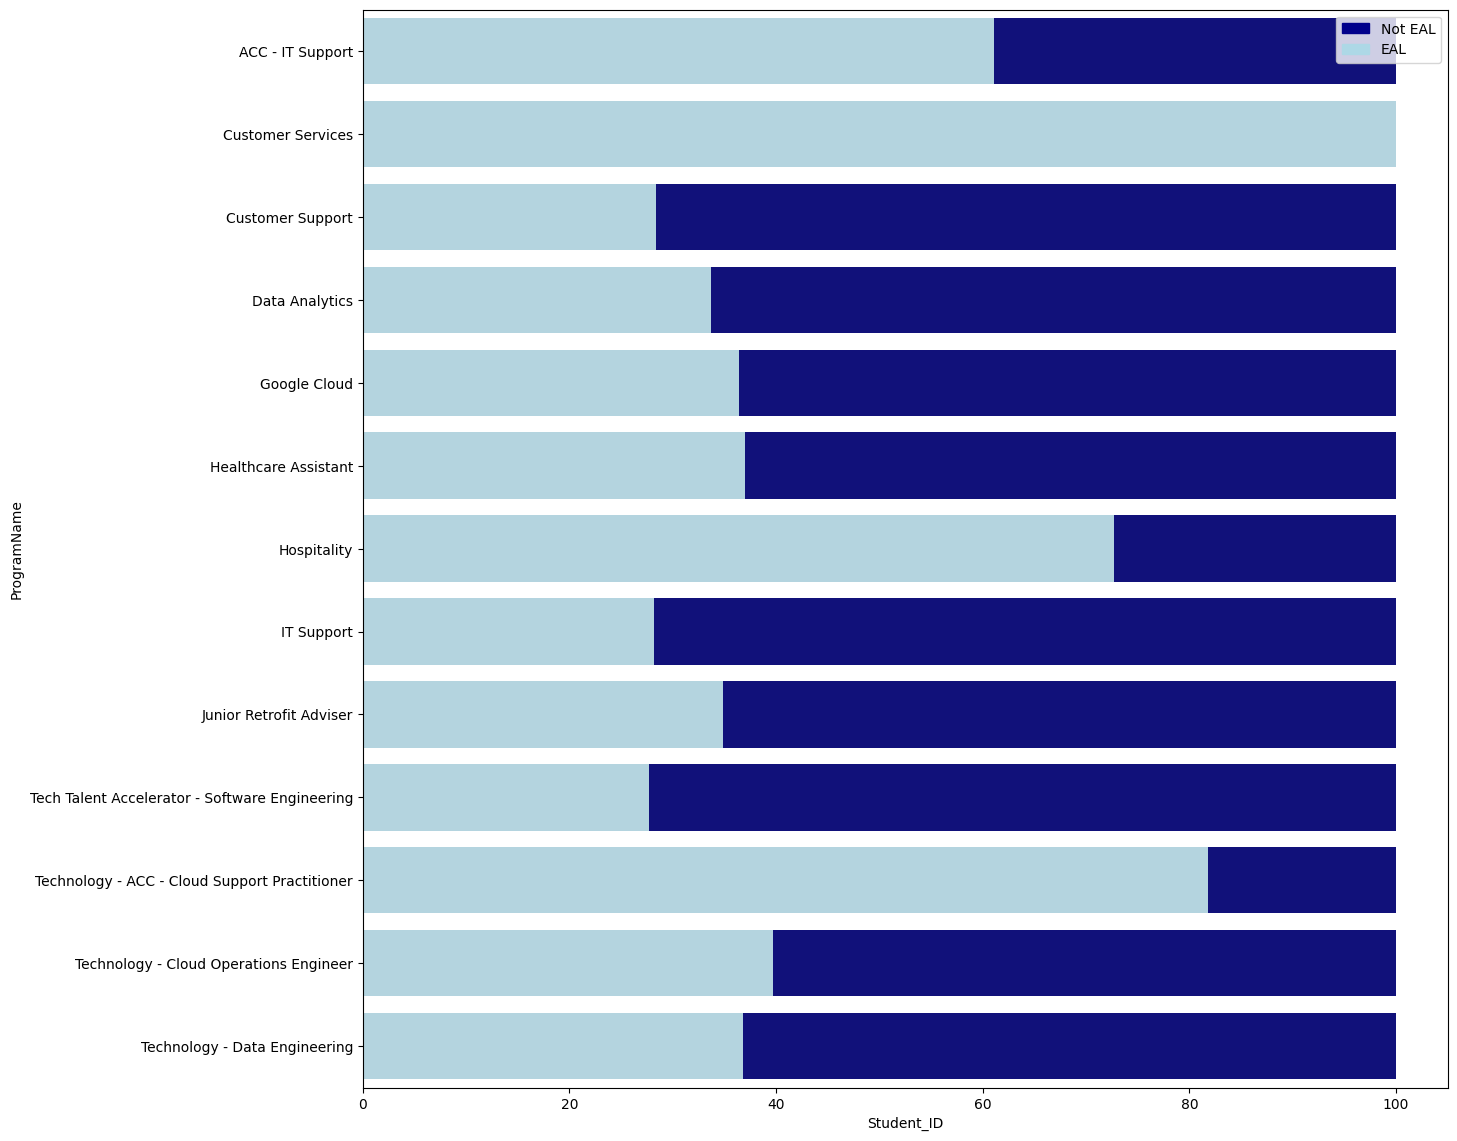

In [368]:
# Create a stacked bar chart:

# import libraries
import matplotlib.patches as mpatches

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
grads_per_programme_count = gen_df.groupby('ProgramName')['Student_ID'].count().reset_index()
EAL_per_programme = gen_df[gen_df["is_EAL"]==1].groupby('ProgramName')['is_EAL'].sum().reset_index()
EAL_per_programme['is_EAL'] = [i / j * 100 for i,j in zip(EAL_per_programme['is_EAL'], grads_per_programme_count['Student_ID'])]
grads_per_programme_count['Student_ID'] = [i / j * 100 for i,j in zip(grads_per_programme_count['Student_ID'], grads_per_programme_count['Student_ID'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="ProgramName",  x="Student_ID", data=grads_per_programme_count, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(y="ProgramName", x="is_EAL", data=EAL_per_programme, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Not EAL')
bottom_bar = mpatches.Patch(color='lightblue', label='EAL')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [374]:
grads_per_programme_count

,ProgramName,Student_ID
0,ACC - IT Support,100.0
1,Customer Services,100.0
2,Customer Support,100.0
3,Data Analytics,100.0
4,Google Cloud,100.0
5,Healthcare Assistant,100.0
6,Hospitality,100.0
7,IT Support,100.0
8,Junior Retrofit Adviser,100.0
9,Tech Talent Accelerator - Software Engineering,100.0


In [375]:
EAL_per_programme

,ProgramName,is_EAL
0,ACC - IT Support,61.111111
1,Customer Services,100.000000
2,Customer Support,28.333333
3,Data Analytics,33.720930
4,Google Cloud,36.363636
5,Healthcare Assistant,36.964981
6,Hospitality,72.727273
7,IT Support,28.196721
8,Junior Retrofit Adviser,34.868421
9,Tech Talent Accelerator - Software Engineering,27.659574
